In [21]:
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('input/top50.csv', encoding='latin-1')
df.head()
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.dtypes

Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [4]:
num_features = [feature for feature in df.columns if df[feature].dtypes == 'int64']
num_features

['Beats.Per.Minute',
 'Energy',
 'Danceability',
 'Loudness..dB..',
 'Liveness',
 'Valence.',
 'Length.',
 'Acousticness..',
 'Speechiness.',
 'Popularity']

In [5]:
dfi = df[num_features]

In [6]:
model = KMeans(n_clusters=3)
model.fit(dfi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
model.labels_

array([1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1], dtype=int32)

In [8]:
model.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [9]:
df['cluster'] = model.labels_

In [10]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,cluster
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,1
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,0
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,2
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,1
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,2


In [11]:
df.Genre.value_counts()

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
reggaeton           2
panamanian pop      2
canadian pop        2
reggaeton flow      2
country rap         2
electropop          2
brostep             2
dfw rap             2
atl hip hop         1
australian pop      1
pop house           1
trap music          1
big room            1
r&b en espanol      1
boy band            1
escape room         1
Name: Genre, dtype: int64

Working inertia to determine how many clusters

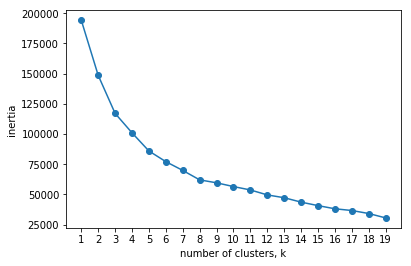

In [12]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(dfi)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Plotting clusters with TSNE

<IPython.core.display.Javascript object>


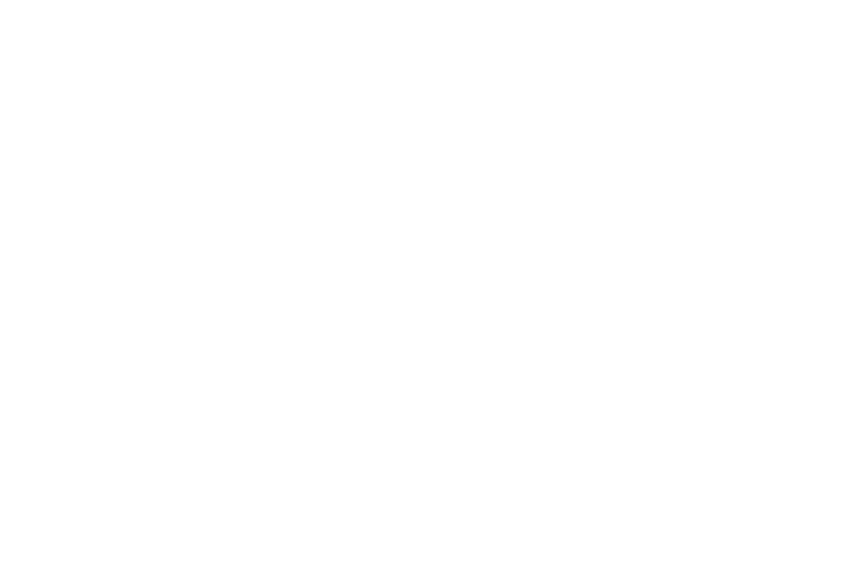

<IPython.core.display.Javascript object>


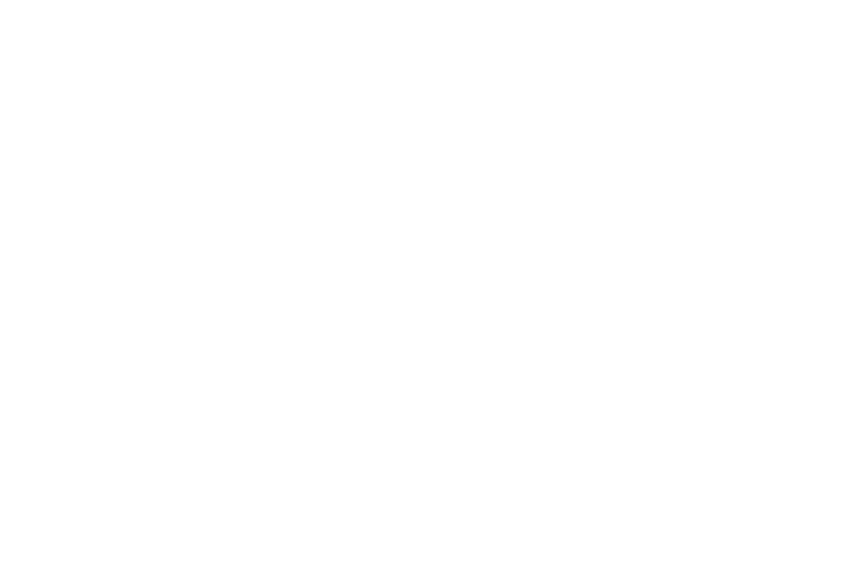

In [23]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Normalize the input
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normal_dfi = scaler.fit_transform(dfi)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normal_dfi)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, genre in zip(xs, ys, df['Genre']):
    plt.annotate(genre, (x, y), fontsize=5, alpha=0.75)
plt.show()